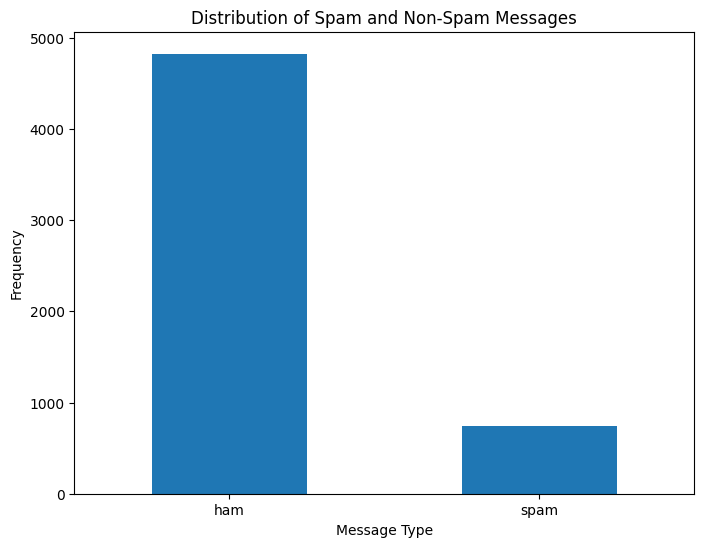

100%|██████████| 5572/5572 [00:00<00:00, 1106460.65it/s]


(0.9838565022421525,
 {'ham': {'precision': 0.9836567926455567,
   'recall': 0.9979274611398964,
   'f1-score': 0.9907407407407408,
   'support': 965.0},
  'spam': {'precision': 0.9852941176470589,
   'recall': 0.8933333333333333,
   'f1-score': 0.9370629370629371,
   'support': 150.0},
  'accuracy': 0.9838565022421525,
  'macro avg': {'precision': 0.9844754551463077,
   'recall': 0.9456303972366149,
   'f1-score': 0.963901838901839,
   'support': 1115.0},
  'weighted avg': {'precision': 0.9838770605829786,
   'recall': 0.9838565022421525,
   'f1-score': 0.9835195115464174,
   'support': 1115.0}})

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import numpy as np
from tqdm import tqdm
import pandas as pd
import tkinter as tk
from tkinter import Label, Entry, Button, StringVar

df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

df.head()


spam_counts = df['v1'].value_counts()


plt.figure(figsize=(8, 6))
spam_counts.plot(kind='bar')
plt.title('Distribution of Spam and Non-Spam Messages')
plt.xlabel('Message Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

spam_distribution = df['v1'].value_counts()


spam_distribution



tqdm.pandas()
df['processed_text'] = df['v2'].progress_apply(lambda x: x.lower())


X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['v1'], test_size=0.2, random_state=42)


pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())
])


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)


report = classification_report(y_test, y_pred, output_dict=True)


accuracy, report

In [19]:

data = pd.read_csv('spam.csv', encoding='latin-1')
data = data[['v1', 'v2']] 


vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['v2'])
y = data['v1']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)



Model Accuracy: 0.97847533632287


In [20]:

data = pd.read_csv('spam.csv', encoding='latin-1')
data = data[['v1', 'v2']]  


vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['v2'])
y = data['v1']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)


class EmailSpamDetectorApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Email Spam Detector")

        self.message_var = StringVar()
        self.prediction_var = StringVar()

        Label(root, text="Enter your message:").pack(pady=10)
        Entry(root, textvariable=self.message_var, width=40).pack(pady=10)

        Button(root, text="Predict", command=self.predict_spam).pack(pady=10)

        Label(root, textvariable=self.prediction_var).pack(pady=10)

    def predict_spam(self):
        message = self.message_var.get()
        message_vectorized = vectorizer.transform([message])
        prediction = model.predict(message_vectorized)[0]
        self.prediction_var.set(f"Prediction: {prediction}")

if __name__ == "__main__":
    root = tk.Tk()
    app = EmailSpamDetectorApp(root)
    root.mainloop()
